In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Load big mart data set

In [57]:
bmdata= pd.read_csv("Train_UWu5bXk.csv")

#check head
bmdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data Visualisation

C:\Users\Pedro\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Pedro\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


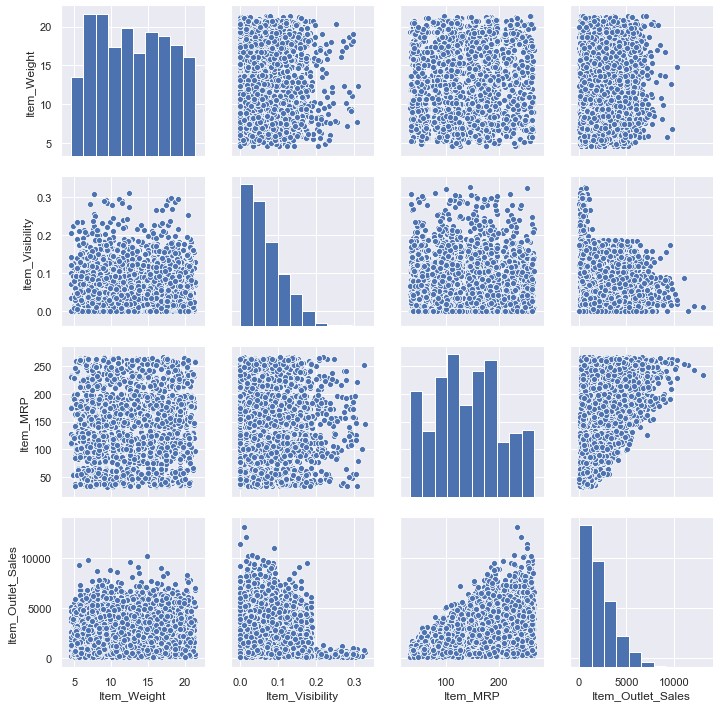

In [58]:
#list of numerical columns
Numcols=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']

# a basic pairplot to compare these variables
sns.pairplot(bmdata[Numcols])

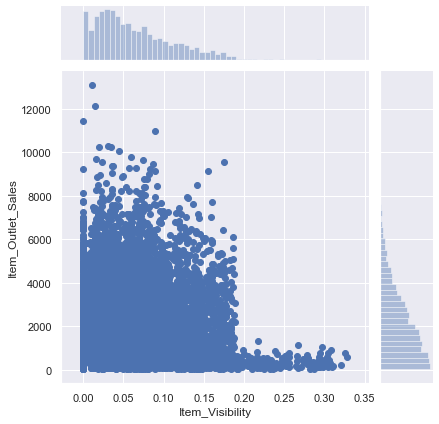

In [59]:
sns.jointplot(x='Item_Visibility', y='Item_Outlet_Sales', data=bmdata)

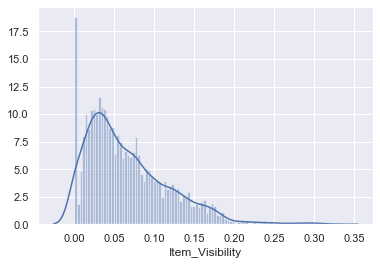

In [60]:
sns.distplot(bmdata['Item_Visibility'],bins=100)

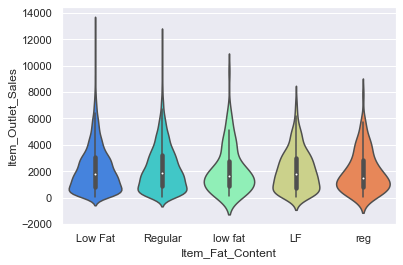

In [61]:
sns.violinplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=bmdata,palette='rainbow')

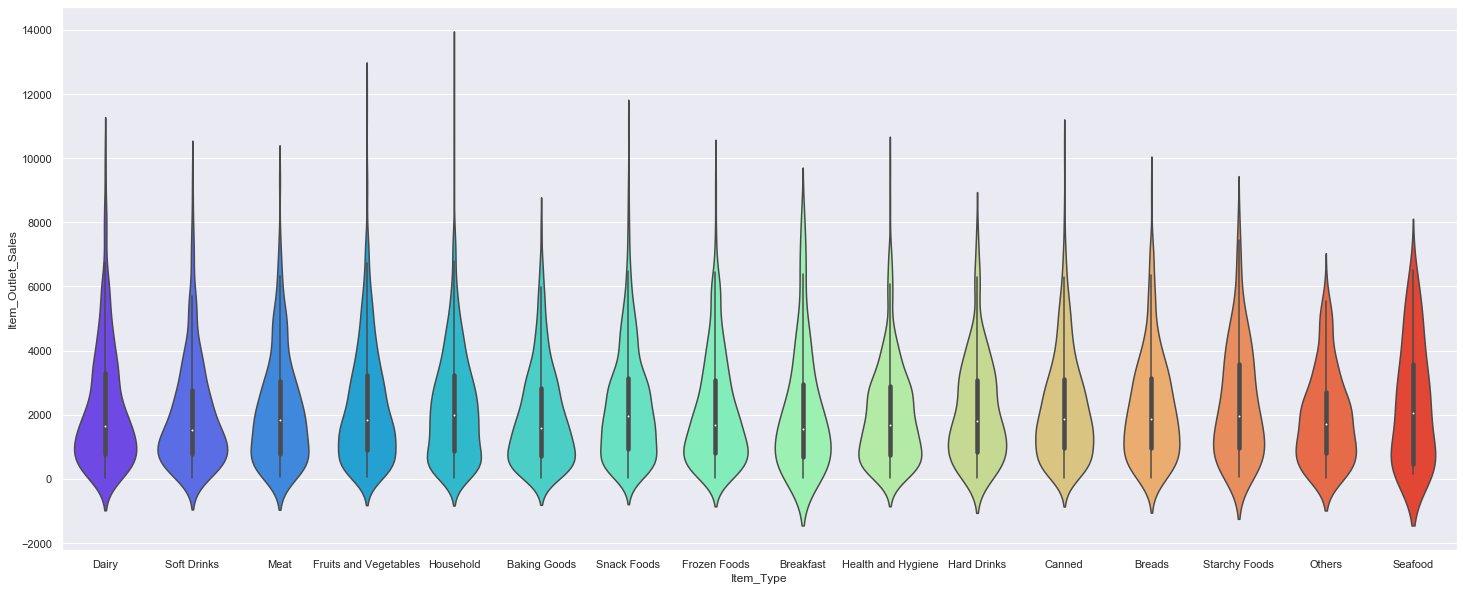

In [62]:
plt.figure(figsize=[25,10])
sns.violinplot(x="Item_Type", y="Item_Outlet_Sales", data=bmdata,palette='rainbow')

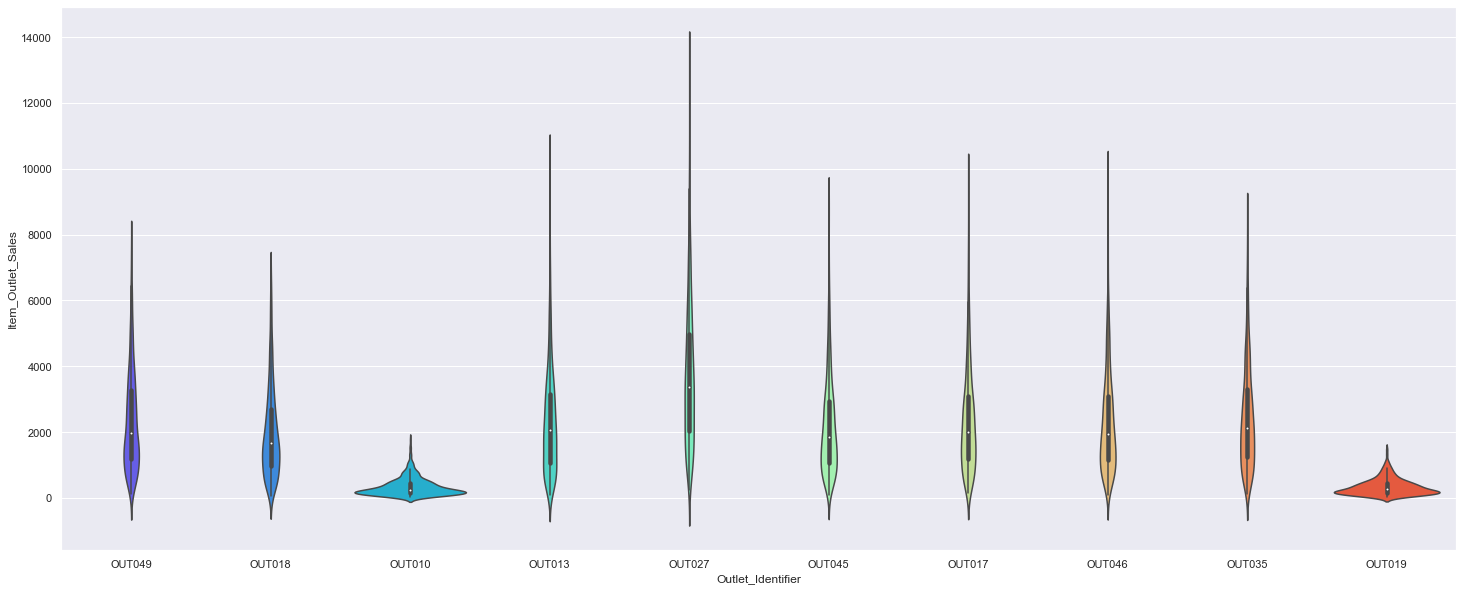

In [63]:
plt.figure(figsize=[25,10])
sns.violinplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=bmdata,palette='rainbow')

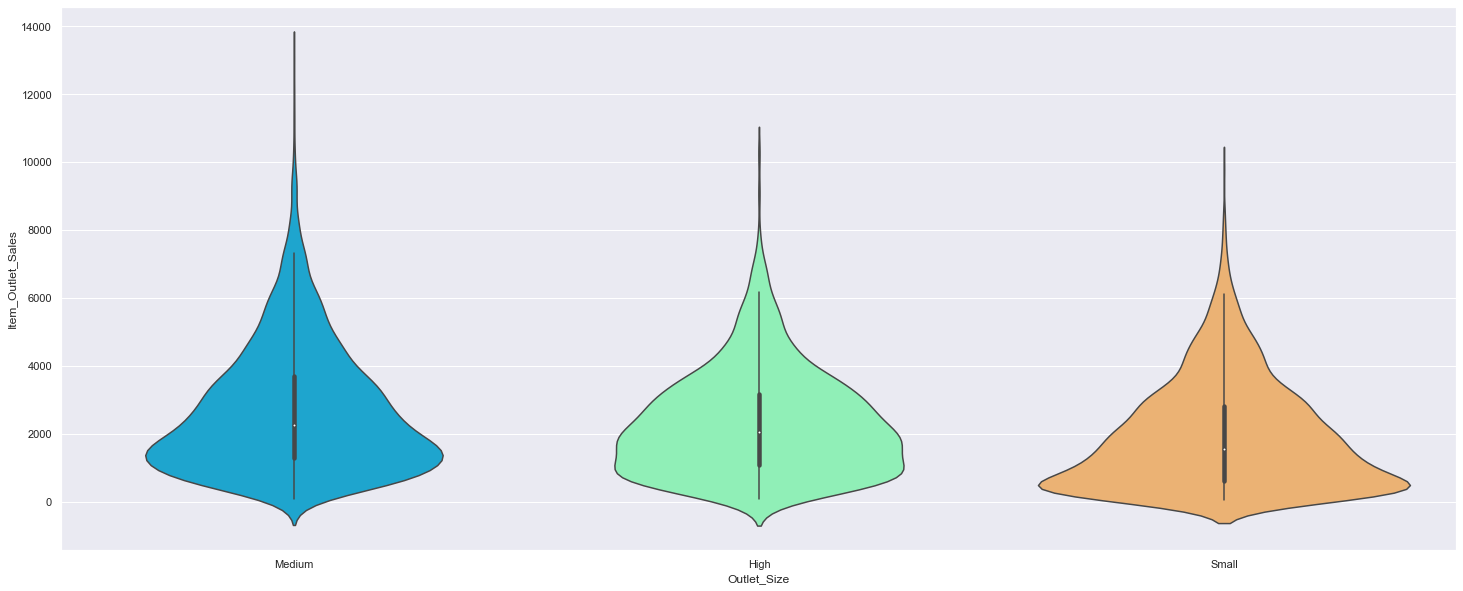

In [64]:
plt.figure(figsize=[25,10])
sns.violinplot(x="Outlet_Size", y="Item_Outlet_Sales", data=bmdata,palette='rainbow')

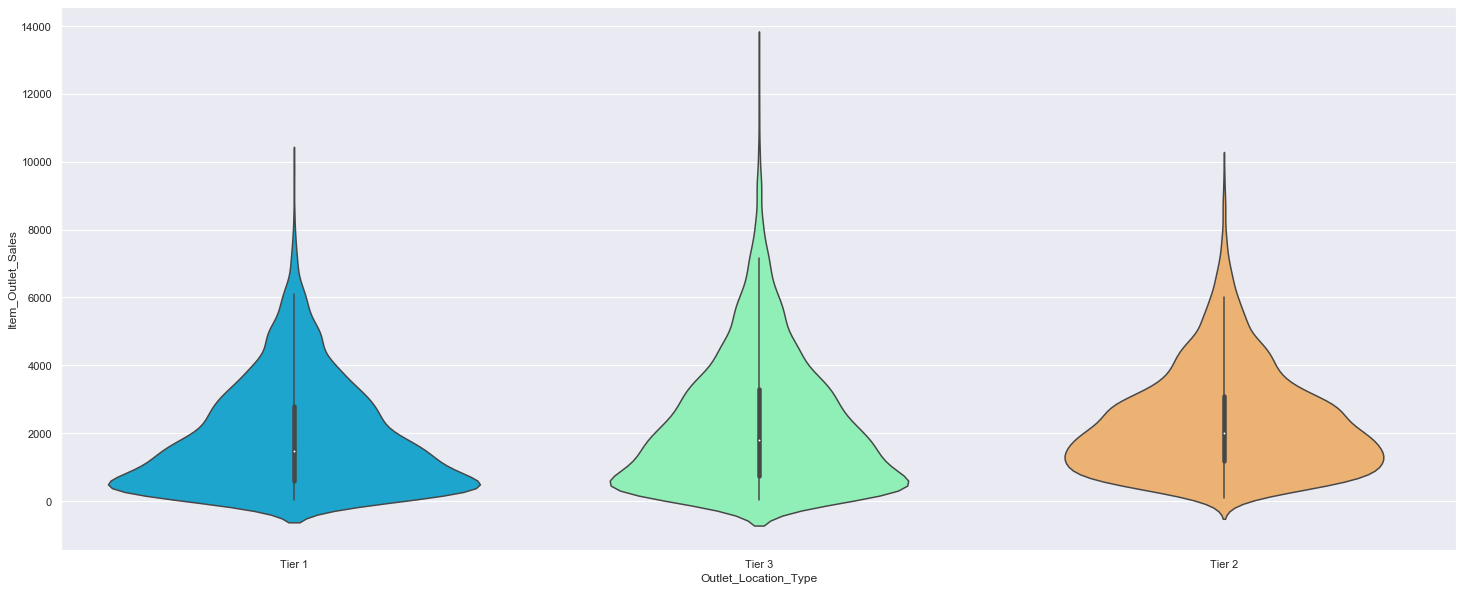

In [65]:
plt.figure(figsize=[25,10])
sns.violinplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=bmdata,palette='rainbow')

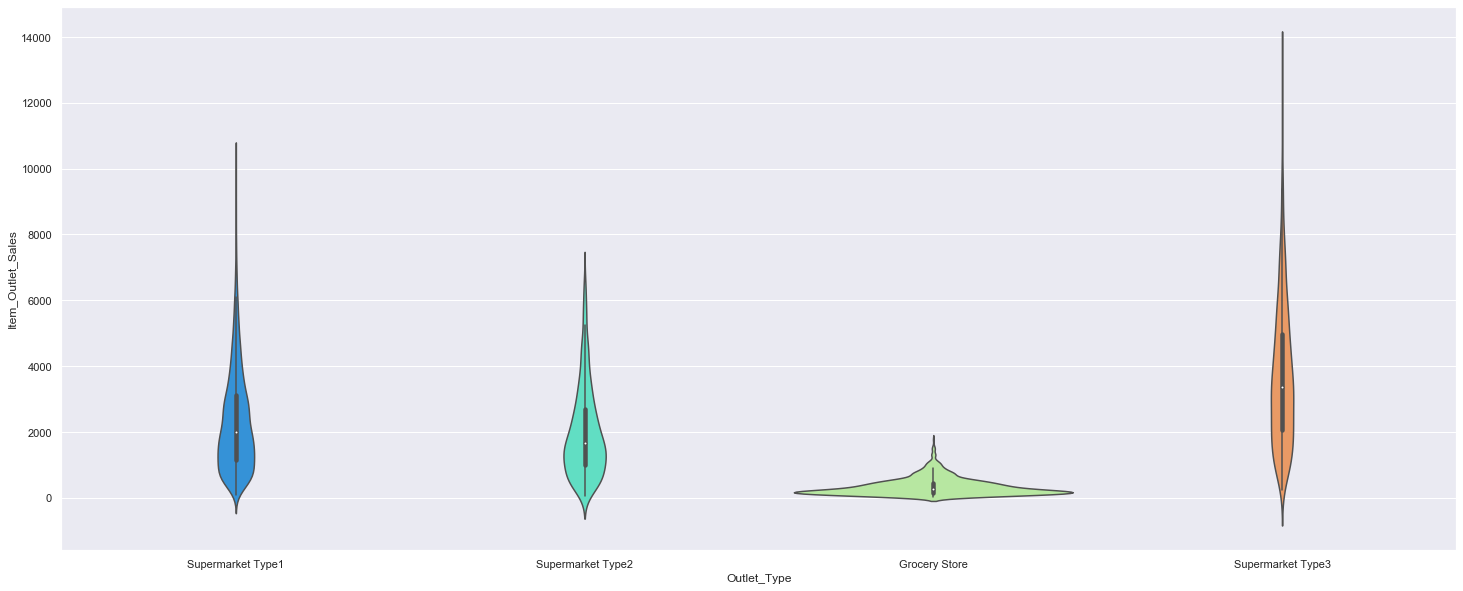

In [66]:
plt.figure(figsize=[25,10])
sns.violinplot(x="Outlet_Type", y="Item_Outlet_Sales", data=bmdata,palette='rainbow')

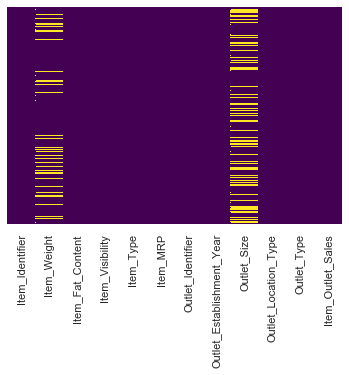

In [67]:
# Let us check if there are any missing values

sns.heatmap(bmdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#indeed Item_Weight and Outlet_Size have a lot of these, let us do something about this

In [68]:
bmdata_clean=bmdata

#Filling in Item_Weight NA's by considering the mean of item weight by Item_Identifier

bmdata_clean_isnull=bmdata_clean.isnull()

bmdata_byiid=bmdata_clean.groupby(by='Item_Identifier')
bmdata_byiid_means=bmdata_byiid['Item_Weight'].mean()
bmdata_clean['mean_weight_by_iid']=[bmdata_byiid_means[item] for item in bmdata_clean['Item_Identifier']]
bmdata_clean.loc[bmdata_clean_isnull['Item_Weight'],'Item_Weight']=bmdata_clean.loc[bmdata_clean_isnull['Item_Weight'],'mean_weight_by_iid']

#Filling in the remaining Item_Weight NA's by considering the mean of item weight by Item_Type

bmdata_clean_isnull=bmdata_clean.isnull()

bmdata_byitype=bmdata_clean.groupby(by='Item_Type')
bmdata_byitype_means=bmdata_byitype['Item_Weight'].mean()
bmdata_clean['mean_weight_by_itype']=[bmdata_byitype_means[item] for item in bmdata_clean['Item_Type']]
bmdata_clean.loc[bmdata_clean_isnull['Item_Weight'],'Item_Weight']=bmdata_clean.loc[bmdata_clean_isnull['Item_Weight'],'mean_weight_by_itype']

#Dropping Auxiliary collumns created

bmdata_clean.drop(labels=['mean_weight_by_iid','mean_weight_by_itype'],axis=1,inplace=True)

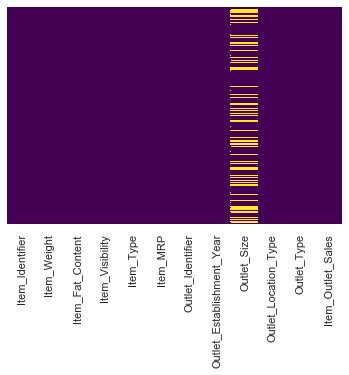

In [69]:
sns.heatmap(bmdata_clean.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [70]:
#Filling in zero item visibility by considering the mean of item visibility by Item_Identifier

bmdata_clean_Visg0=bmdata_clean[bmdata_clean['Item_Visibility']>0]

bmdata_clean_Visg0_byiid = bmdata_clean_Visg0.groupby(by='Item_Identifier')
bmdata_clean_Visg0_byiid_means=bmdata_clean_Visg0_byiid['Item_Visibility'].mean()

bmdata_clean['mean_vis_by_iid']=[bmdata_clean_Visg0_byiid_means[item] for item in bmdata_clean['Item_Identifier']]
bmdata_clean.loc[bmdata_clean['Item_Visibility']==0,'Item_Visibility']=bmdata_clean.loc[bmdata_clean['Item_Visibility']==0,'mean_vis_by_iid']

#Dropping Auxiliary collumns created

bmdata_clean.drop(labels=['mean_vis_by_iid'],axis=1,inplace=True)

bmdata_clean

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.091392,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


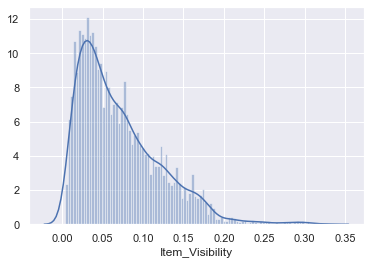

In [71]:
sns.distplot(bmdata_clean['Item_Visibility'],bins=100)

In [72]:
#creating a dictionary classifying item duration from item type

my_dict_itemduration = dict.fromkeys(["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"], 'perishable')
my_dict_itemduration.update(dict.fromkeys(["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"], 'non-perishable'))
my_dict_itemduration.update(dict.fromkeys(['Snack Foods','Starchy Foods', 'Others'], 'unknown duration'))

In [73]:
#creating new item duration column according to above dictionary

bmdata_clean['Item_Duration']=bmdata_clean['Item_Type']

def translate(st):
    return my_dict_itemduration[st]

bmdata_clean['Item_Duration']=bmdata_clean['Item_Duration'].apply(translate,)
bmdata_clean

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Duration
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non-perishable
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,FDX07,19.200,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,perishable
4,NCD19,8.930,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-perishable
5,FDP36,10.395,Regular,0.091392,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,non-perishable
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,unknown duration
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,unknown duration
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,non-perishable
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,non-perishable


In [74]:
bmdata_clean['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [75]:
#creating a dictionary classifying Item_Fat_Content

my_dict_itemfat = dict.fromkeys(['Low Fat', 'low fat', 'LF'], 'Low Fat')
my_dict_itemfat.update(dict.fromkeys(['Regular', 'reg'], 'Regular Fat'))

In [76]:
#clean up fat content

def translate_fat(st):
    return my_dict_itemfat[st]

bmdata_clean['Item_Fat_Content']=bmdata_clean['Item_Fat_Content'].apply(translate_fat)
bmdata_clean

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Duration
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable
1,DRC01,5.920,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non-perishable
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable
3,FDX07,19.200,Regular Fat,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,perishable
4,NCD19,8.930,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-perishable
5,FDP36,10.395,Regular Fat,0.091392,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,non-perishable
6,FDO10,13.650,Regular Fat,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,unknown duration
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,unknown duration
8,FDH17,16.200,Regular Fat,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,non-perishable
9,FDU28,19.200,Regular Fat,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,non-perishable


In [77]:
#creating an item category column with data from Item_identifier

bmdata_clean['Item_Category']=bmdata_clean['Item_Identifier'].apply(lambda st: st[0:2])
bmdata_clean

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Duration,Item_Category
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,FD
1,DRC01,5.920,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non-perishable,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,FD
3,FDX07,19.200,Regular Fat,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,perishable,FD
4,NCD19,8.930,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-perishable,NC
5,FDP36,10.395,Regular Fat,0.091392,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,non-perishable,FD
6,FDO10,13.650,Regular Fat,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,unknown duration,FD
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,unknown duration,FD
8,FDH17,16.200,Regular Fat,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,non-perishable,FD
9,FDU28,19.200,Regular Fat,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,non-perishable,FD


In [78]:
bmdata_clean['Item_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [79]:
# non-edible items should not have fat content!

bmdata_clean.loc[bmdata_clean['Item_Category']=='NC','Item_Fat_Content']='non-edible'
bmdata_clean

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Duration,Item_Category
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,FD
1,DRC01,5.920,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non-perishable,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,FD
3,FDX07,19.200,Regular Fat,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,perishable,FD
4,NCD19,8.930,non-edible,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-perishable,NC
5,FDP36,10.395,Regular Fat,0.091392,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,non-perishable,FD
6,FDO10,13.650,Regular Fat,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,unknown duration,FD
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,unknown duration,FD
8,FDH17,16.200,Regular Fat,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,non-perishable,FD
9,FDU28,19.200,Regular Fat,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,non-perishable,FD


In [80]:
# Age of the outlet may be more useful than establishment year

bmdata_clean['Outlet_Age_Years']=bmdata_clean['Outlet_Establishment_Year'].apply(lambda year: 2019-year)
bmdata_clean

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Duration,Item_Category,Outlet_Age_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,FD,20
1,DRC01,5.920,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non-perishable,DR,10
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,FD,20
3,FDX07,19.200,Regular Fat,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,perishable,FD,21
4,NCD19,8.930,non-edible,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-perishable,NC,32
5,FDP36,10.395,Regular Fat,0.091392,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,non-perishable,FD,10
6,FDO10,13.650,Regular Fat,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,unknown duration,FD,32
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,unknown duration,FD,34
8,FDH17,16.200,Regular Fat,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,non-perishable,FD,17
9,FDU28,19.200,Regular Fat,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,non-perishable,FD,12


In [81]:
#creating a column with price per unit of weight

def ppuw(mrp, wei):
    return mrp/wei

bmdata_clean['price_unit_weight']=bmdata_clean[['Item_MRP','Item_Weight']].apply(lambda x: ppuw(x['Item_MRP'],x['Item_Weight']),axis =1)

In [82]:
bmdata_clean

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Duration,Item_Category,Outlet_Age_Years,price_unit_weight
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,FD,20,26.861204
1,DRC01,5.920,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non-perishable,DR,10,8.153581
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,FD,20,8.092457
3,FDX07,19.200,Regular Fat,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,perishable,FD,21,9.484115
4,NCD19,8.930,non-edible,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-perishable,NC,32,6.031512
5,FDP36,10.395,Regular Fat,0.091392,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,non-perishable,FD,10,4.944762
6,FDO10,13.650,Regular Fat,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,unknown duration,FD,32,4.224088
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,unknown duration,FD,34,5.671695
8,FDH17,16.200,Regular Fat,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,non-perishable,FD,17,5.985963
9,FDU28,19.200,Regular Fat,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,non-perishable,FD,12,9.782365


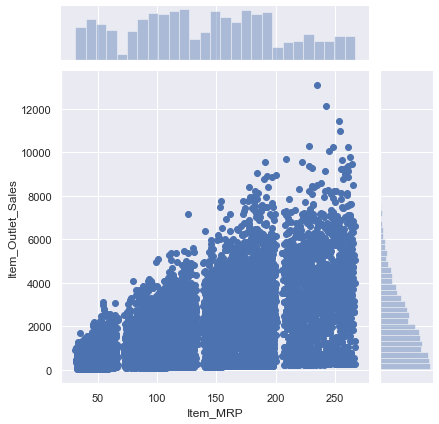

In [83]:
sns.jointplot(x='Item_MRP', y='Item_Outlet_Sales', data=bmdata)

In [84]:
#Item_MRP_clusters

def mrp_clust(mrp):
    if mrp<69:
        out='1st'
    elif 69<=mrp<136:
        out='2nd'
    elif 136<=mrp<203:
        out='3rd'
    else:
        out='4th'
    return out

bmdata_clean['Item_MRP_clusters']=bmdata_clean['Item_MRP'].apply(mrp_clust)

bmdata_clean

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Duration,Item_Category,Outlet_Age_Years,price_unit_weight,Item_MRP_clusters
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,FD,20,26.861204,4th
1,DRC01,5.920,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non-perishable,DR,10,8.153581,1st
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,FD,20,8.092457,3rd
3,FDX07,19.200,Regular Fat,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,perishable,FD,21,9.484115,3rd
4,NCD19,8.930,non-edible,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non-perishable,NC,32,6.031512,1st
5,FDP36,10.395,Regular Fat,0.091392,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,non-perishable,FD,10,4.944762,1st
6,FDO10,13.650,Regular Fat,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,unknown duration,FD,32,4.224088,1st
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,unknown duration,FD,34,5.671695,2nd
8,FDH17,16.200,Regular Fat,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,non-perishable,FD,17,5.985963,2nd
9,FDU28,19.200,Regular Fat,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,non-perishable,FD,12,9.782365,3rd


In [85]:
bmdata_clean['Outlet_Size'].isnull().sum()/bmdata_clean.shape[0]

0.2827642848762173

In [86]:
bmdata_clean.drop(['Item_Identifier','Outlet_Establishment_Year','Outlet_Size'],axis=1,inplace=True)

In [87]:
bmdata_clean

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Duration,Item_Category,Outlet_Age_Years,price_unit_weight,Item_MRP_clusters
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Tier 1,Supermarket Type1,3735.1380,perishable,FD,20,26.861204,4th
1,5.920,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,Tier 3,Supermarket Type2,443.4228,non-perishable,DR,10,8.153581,1st
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Tier 1,Supermarket Type1,2097.2700,perishable,FD,20,8.092457,3rd
3,19.200,Regular Fat,0.022911,Fruits and Vegetables,182.0950,OUT010,Tier 3,Grocery Store,732.3800,perishable,FD,21,9.484115,3rd
4,8.930,non-edible,0.016164,Household,53.8614,OUT013,Tier 3,Supermarket Type1,994.7052,non-perishable,NC,32,6.031512,1st
5,10.395,Regular Fat,0.091392,Baking Goods,51.4008,OUT018,Tier 3,Supermarket Type2,556.6088,non-perishable,FD,10,4.944762,1st
6,13.650,Regular Fat,0.012741,Snack Foods,57.6588,OUT013,Tier 3,Supermarket Type1,343.5528,unknown duration,FD,32,4.224088,1st
7,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Tier 3,Supermarket Type3,4022.7636,unknown duration,FD,34,5.671695,2nd
8,16.200,Regular Fat,0.016687,Frozen Foods,96.9726,OUT045,Tier 2,Supermarket Type1,1076.5986,non-perishable,FD,17,5.985963,2nd
9,19.200,Regular Fat,0.094450,Frozen Foods,187.8214,OUT017,Tier 2,Supermarket Type1,4710.5350,non-perishable,FD,12,9.782365,3rd


In [88]:
bmdata_clean.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
Item_Duration           0
Item_Category           0
Outlet_Age_Years        0
price_unit_weight       0
Item_MRP_clusters       0
dtype: int64

In [89]:
#Pre-processing

In [90]:
bmdata_proc=bmdata_clean

In [91]:
categorical_columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Item_Duration', 'Item_Category', 'Item_MRP_clusters']

#one hot encoding
for cc in categorical_columns:
    
    col = pd.get_dummies(bmdata_proc[cc],drop_first=True)

    bmdata_proc.drop(cc,axis=1,inplace=True)

    bmdata_proc=pd.concat([col,bmdata_proc],axis=1)
    
    
bmdata_proc.head()

,2nd,3rd,4th,FD,NC,perishable,unknown duration,Supermarket Type1,Supermarket Type2,Supermarket Type3,...,Soft Drinks,Starchy Foods,Regular Fat,non-edible,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age_Years,price_unit_weight
0,0,0,1,1,0,1,0,1,0,0,...,0,0,0,0,9.30,0.016047,249.8092,3735.1380,20,26.861204
1,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,5.92,0.019278,48.2692,443.4228,10,8.153581
2,0,1,0,1,0,1,0,1,0,0,...,0,0,0,0,17.50,0.016760,141.6180,2097.2700,20,8.092457
3,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,19.20,0.022911,182.0950,732.3800,21,9.484115
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,8.93,0.016164,53.8614,994.7052,32,6.031512


In [92]:
bmdata_clean

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Duration,Item_Category,Outlet_Age_Years,price_unit_weight,Item_MRP_clusters
0,9.300,0.016047,Dairy,249.8092,OUT049,Tier 1,Supermarket Type1,3735.1380,perishable,FD,20,26.861204,4th
1,5.920,0.019278,Soft Drinks,48.2692,OUT018,Tier 3,Supermarket Type2,443.4228,non-perishable,DR,10,8.153581,1st
2,17.500,0.016760,Meat,141.6180,OUT049,Tier 1,Supermarket Type1,2097.2700,perishable,FD,20,8.092457,3rd
3,19.200,0.022911,Fruits and Vegetables,182.0950,OUT010,Tier 3,Grocery Store,732.3800,perishable,FD,21,9.484115,3rd
4,8.930,0.016164,Household,53.8614,OUT013,Tier 3,Supermarket Type1,994.7052,non-perishable,NC,32,6.031512,1st
5,10.395,0.091392,Baking Goods,51.4008,OUT018,Tier 3,Supermarket Type2,556.6088,non-perishable,FD,10,4.944762,1st
6,13.650,0.012741,Snack Foods,57.6588,OUT013,Tier 3,Supermarket Type1,343.5528,unknown duration,FD,32,4.224088,1st
7,19.000,0.127470,Snack Foods,107.7622,OUT027,Tier 3,Supermarket Type3,4022.7636,unknown duration,FD,34,5.671695,2nd
8,16.200,0.016687,Frozen Foods,96.9726,OUT045,Tier 2,Supermarket Type1,1076.5986,non-perishable,FD,17,5.985963,2nd
9,19.200,0.094450,Frozen Foods,187.8214,OUT017,Tier 2,Supermarket Type1,4710.5350,non-perishable,FD,12,9.782365,3rd


In [93]:
numerical_columns=['Item_Weight','Item_Visibility', 'Item_MRP','Outlet_Age_Years','price_unit_weight']

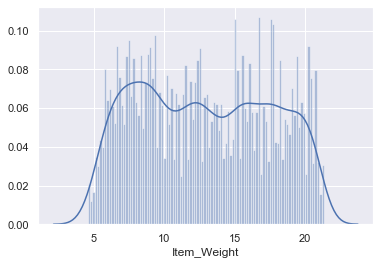

In [94]:
sns.distplot(bmdata_proc['Item_Weight'],bins=100)

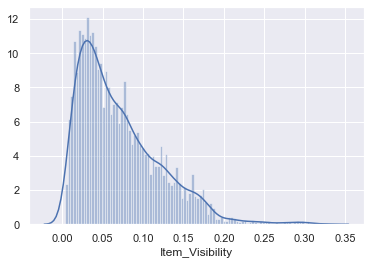

In [95]:
sns.distplot(bmdata_proc['Item_Visibility'],bins=100)

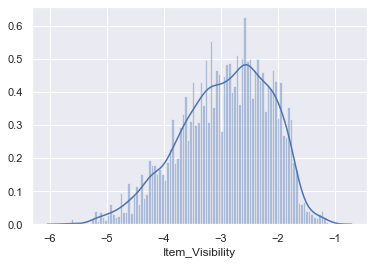

In [96]:
bmdata_proc['Item_Visibility']=bmdata_proc['Item_Visibility'].apply(lambda x: np.log(x))
sns.distplot(bmdata_proc['Item_Visibility'],bins=100)

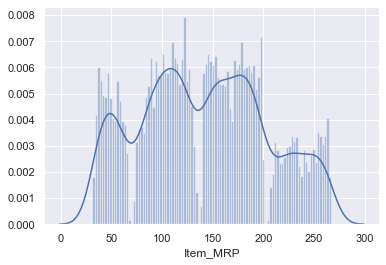

In [97]:
sns.distplot(bmdata_proc['Item_MRP'],bins=100)

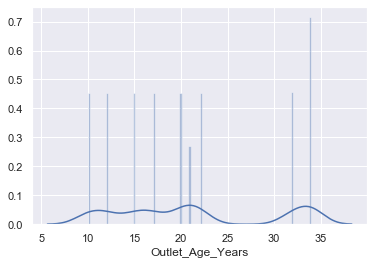

In [98]:
sns.distplot(bmdata_proc['Outlet_Age_Years'],bins=100)

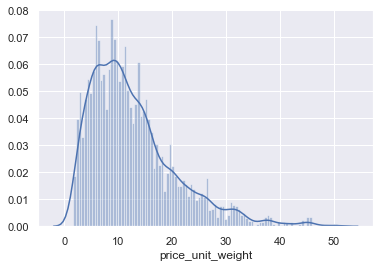

In [99]:
sns.distplot(bmdata_proc['price_unit_weight'],bins=100)

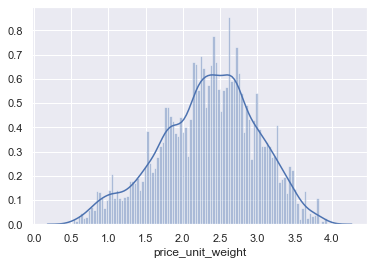

In [100]:
bmdata_proc['price_unit_weight']=bmdata_proc['price_unit_weight'].apply(lambda x: np.log(x))
sns.distplot(bmdata_proc['price_unit_weight'],bins=100)

In [101]:
bmdata_proc.drop(['Outlet_Age_Years','Item_MRP','Item_Weight'],axis=1,inplace=True)

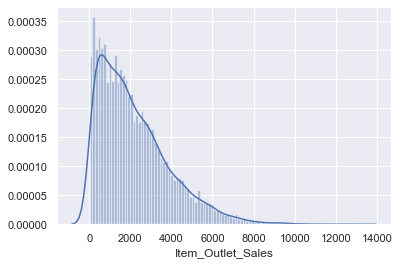

In [102]:
sns.distplot(bmdata_proc['Item_Outlet_Sales'],bins=100)

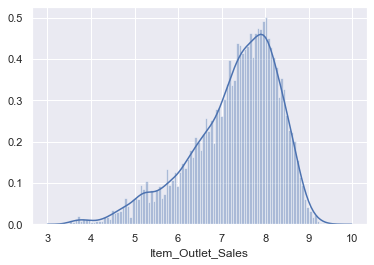

In [103]:
bmdata_proc['Item_Outlet_Sales']=bmdata_proc['Item_Outlet_Sales'].apply(lambda x: np.log(x))
sns.distplot(bmdata_proc['Item_Outlet_Sales'],bins=100)

In [104]:
from sklearn import preprocessing

numerical_columns_final = ['Item_Visibility','price_unit_weight','Item_Outlet_Sales']


x = bmdata_proc[numerical_columns_final].values #returns a numpy array
x_scaled = preprocessing.scale(x)
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
bmdata_proc[numerical_columns_final] = pd.DataFrame(x_scaled)

In [106]:
X=bmdata_proc.drop('Item_Outlet_Sales',axis=1)
y=bmdata_proc['Item_Outlet_Sales']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [109]:
#Linear regression

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [110]:
from sklearn import metrics

In [111]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.40587887094877884
MSE: 0.2765968353684026
RMSE: 0.5259247430653958


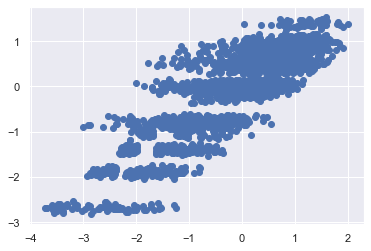

In [112]:
plt.scatter(y_test,predictions)

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=42, n_estimators=100)
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [114]:
predictions =regr.predict(X_test)

In [115]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6110181105250472
MSE: 0.6597075530351957
RMSE: 0.8122238318562166


In [131]:
#Support Vector Regression

import numpy as np



param_grid = {
    'gamma' : ['scale','auto'],
    'C': np.arange(0.1, 10, 0.5),
    'epsilon': np.arange(0.05, 1, 0.05)
             }

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVR

# clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
# clf.fit(X_train,y_train)

grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=1)

grid.fit(X_train,y_train)

predictions = grid.predict(X_test)

print(grid.best_estimator_)

print(grid.best_score_)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 760 candidates, totalling 2280 fits


[Parallel(n_jobs=1)]: Done 2280 out of 2280 | elapsed: 21.7min finished


SVR(C=2.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.5, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.7060838447648432
MAE: 0.40882100241627145
MSE: 0.2789688639363026
RMSE: 0.5281750315343414
